<a href="https://colab.research.google.com/github/NicoD920/Otono2025/blob/main/Tarea_1_ing_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminares

## Carga de datos

In [ ]:
library(readr)
df <- read_csv('https://raw.githubusercontent.com/NicoD920/Otono2025/refs/heads/main/Lead%20Scoring.csv')
head(df)


Rows: 9240 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (30): Prospect ID, Lead Origin, Lead Source, Do Not Email, Do Not Call, ...
dbl  (7): Lead Number, Converted, TotalVisits, Total Time Spent on Website, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,⋯,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0.0,⋯,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Modified
2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5,674,2.5,⋯,No,Select,Select,02.Medium,02.Medium,15,15,No,No,Email Opened
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,⋯,No,Potential Lead,Mumbai,02.Medium,01.High,14,20,No,Yes,Email Opened
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,⋯,No,Select,Mumbai,02.Medium,01.High,13,17,No,No,Modified
3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,1428,1.0,⋯,No,Select,Mumbai,02.Medium,01.High,15,18,No,No,Modified
2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0,0,0.0,⋯,No,NA,NA,01.High,02.Medium,17,15,No,No,Modified


## Carga de librerías

In [ ]:
# Install missing packages if necessary
if(!require(glmnet)){install.packages("glmnet")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(ggcorrplot)){install.packages("ggcorrplot")}
if(!require(fixest)){install.packages("fixest")}
if(!require(tidyverse)){install.packages("tidyverse")}
if(!require(kableExtra)){install.packages("kableExtra")}
if(!require(skimr)){install.packages("skimr")}


library(glmnet)     #Ajusta modelo lineal
library(ggplot2)    #Para realización de gráficos
library(ggcorrplot) #Para realizar correlogramas
library(fixest)     #Para correr modelos con efectos fijos
library(tidyverse)  #Funcionalidades para manipular y desplegar datos
library(kableExtra) #Para formatear tablas
library(skimr)

## Exploración de datos

### Observación de variables de interés

***Page Views Per Visit***: Esta es nuestra variable objetivo

Tomando en cuenta el contexto del ejercicio tomaré las variables de interés iniciales como:



*   **Total Time Spent on Webstite (Tiempo total en el sitio web.)**: Esta variable puede ayudarnos a dirigir posteriormente ajustes en la página, para buscar que el usuario permanezca más tiempo en ella
*   **TotalVisits (Total de visitas del cliente al sitio web.)**: Para ver si hay que reforzar la cantidad de visitas que haga cliente de alguna forma
*   **Lead Source / Lead Origin (Fuente del lead (Google, búsqueda orgánica, chat, etc.). / Origen del lead (API, formulario web, etc.).)**: Observar que medios son más efectivos
*   **Lead Quality (Calidad del lead según evaluación del personal.)**: Sigue la idea anterior en dónde podemos dar incapié a ciertos medios para la conversión efectiva de usuarios
*   **Lead Profile (Perfil asignado al cliente.)**: Permite comprender si la asignación previa se está realizando de forma correcta, tal vez los criterios que se usan para determinarlo ya implican relación con otras variables de una u otra manera, así que cuidado acá
*   **Specialization (Área en la que trabajaba el cliente.)**: Permite enfocarse en ciertas áreas o tal vez buscar que es lo que hace que ciertas áreas no tengan interés en nosotros
*   **Country / City**: Clásico análisis demográfico
*   **Do not Email / Do not Call / Recieve More Updates About Our Courses (Si el cliente pidió no recibir correos. /Si el cliente pidió no recibir llamadas./  Si pidió recibir más información de los cursos. )**: Esto para reforzar ciertas interacciones con los clientes o dejar de hacerlas si no son convenientes
*   **Digital Advertisement ( Si lo supo por publicidad digital.)**: Para saber si la publicidad digital es efectiva
*   **Search (Si vio el aviso en búsquedas listadas.)**: Para saber si el medio es efectivo
*   **Magazine (Si supo del curso por una revista.)**: Para saber si el medio es efectivo
*   **Newspaper Article ( Si lo supo por un artículo de diario.)**: Para saber si el medio es efectivo
*   **X Education Forum ( Si lo supo por foros de X Education.)**: Para saber si el medio es efectivo
*   **Newspape (Si lo supo por el diario.)**: Para saber si el medio es efectivo
*   **Tags (Etiquetas asignadas según el estado del lead.)**: Puede ser útil

Estas son las variabnles que encuentro que pueden ayudar


### Generamos un subset que incluya solo las variables de interés para facilitar la visualización y trabajo

In [ ]:
# Vector con los nombres de las variables seleccionadas
variables_seleccionadas <- c(
  "Total Time Spent on Website",
  "TotalVisits",
  "Lead Source",
  "Lead Origin",
  "Lead Quality",
  "Lead Profile",
  "Specialization",
  "Country",
  "City",
  "Do Not Email",
  "Do Not Call",
  "Receive More Updates About Our Courses",
  "Digital Advertisement",
  "Search",
  "Magazine",
  "Newspaper Article",
  "X Education Forums",
  "Newspaper",
  "Tags",
  'Page Views Per Visit'
)

# Crear el subset del dataframe
df_subset <- df[ , variables_seleccionadas]


### Cambiamos los nombres para facilitar el trabajo posterior

In [ ]:
library(dplyr)

df_subset <- df_subset %>%
  rename(
    time_on_site     = `Total Time Spent on Website`,
    total_visits     = TotalVisits,
    lead_source      = `Lead Source`,
    lead_origin      = `Lead Origin`,
    lead_quality     = `Lead Quality`,
    lead_profile     = `Lead Profile`,
    specialization   = Specialization,
    country          = Country,
    city             = City,
    no_email         = `Do Not Email`,
    no_call          = `Do Not Call`,
    wants_updates    = `Receive More Updates About Our Courses`,
    from_ads         = `Digital Advertisement`,
    from_search      = Search,
    from_magazine    = Magazine,
    from_article     = `Newspaper Article`,
    from_forum       = `X Education Forums`,
    from_newspaper   = Newspaper,
    tags             = Tags,
    page_views_visit = `Page Views Per Visit`
  )


### Observamos los datos

In [ ]:
head(df_subset)

time_on_site,total_visits,lead_source,lead_origin,lead_quality,lead_profile,specialization,country,city,no_email,no_call,wants_updates,from_ads,from_search,from_magazine,from_article,from_forum,from_newspaper,tags,page_views_visit
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,0,Olark Chat,API,Low in Relevance,Select,Select,NA,Select,No,No,No,No,No,No,No,No,No,Interested in other courses,0.0
674,5,Organic Search,API,NA,Select,Select,India,Select,No,No,No,No,No,No,No,No,No,Ringing,2.5
1532,2,Direct Traffic,Landing Page Submission,Might be,Potential Lead,Business Administration,India,Mumbai,No,No,No,No,No,No,No,No,No,Will revert after reading the email,2.0
305,1,Direct Traffic,Landing Page Submission,Not Sure,Select,Media and Advertising,India,Mumbai,No,No,No,No,No,No,No,No,No,Ringing,1.0
1428,2,Google,Landing Page Submission,Might be,Select,Select,India,Mumbai,No,No,No,No,No,No,No,No,No,Will revert after reading the email,1.0
0,0,Olark Chat,API,NA,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,NA,0.0


In [ ]:
summary(df_subset)

  time_on_site     total_visits     lead_source        lead_origin       
 Min.   :   0.0   Min.   :  0.000   Length:9240        Length:9240       
 1st Qu.:  12.0   1st Qu.:  1.000   Class :character   Class :character  
 Median : 248.0   Median :  3.000   Mode  :character   Mode  :character  
 Mean   : 487.7   Mean   :  3.445                                        
 3rd Qu.: 936.0   3rd Qu.:  5.000                                        
 Max.   :2272.0   Max.   :251.000                                        
                  NA's   :137                                            
 lead_quality       lead_profile       specialization       country         
 Length:9240        Length:9240        Length:9240        Length:9240       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                       

### Observamos los valores únicos que contiene cada columna

In [ ]:
unique_counts <- sapply(df_subset, function(x) length(unique(x)))

# Convertir a data frame para mejor visualización
unique_counts_df <- data.frame(
  variable = names(unique_counts),
  unique_values = as.vector(unique_counts)
)

# Mostrar la tabla
print(unique_counts_df)



           variable unique_values
1      time_on_site          1731
2      total_visits            42
3       lead_source            22
4       lead_origin             5
5      lead_quality             6
6      lead_profile             7
7    specialization            20
8           country            39
9              city             8
10         no_email             2
11          no_call             2
12    wants_updates             1
13         from_ads             2
14      from_search             2
15    from_magazine             1
16     from_article             2
17       from_forum             2
18   from_newspaper             2
19             tags            27
20 page_views_visit           115


### Observamos la cantidad de valores nulos

In [ ]:
# Total de filas del dataset
total_filas <- nrow(df_subset)
print(total_filas)

[1] 9240


In [ ]:
# Total de filas del dataset
total_filas <- nrow(df_subset)

# Calcular cantidad de NAs por columna
na_counts <- colSums(is.na(df_subset))

# Calcular porcentaje de NAs
na_percentage <- round(na_counts / total_filas * 100, 2)

# Crear tabla resumen
na_summary_df <- data.frame(
  #variable = names(na_counts),
  na_count = as.vector(na_counts),
  na_percentage = na_percentage
)

# Mostrar tabla
print(na_summary_df)


                 na_count na_percentage
time_on_site            0          0.00
total_visits          137          1.48
lead_source            36          0.39
lead_origin             0          0.00
lead_quality         4767         51.59
lead_profile         2709         29.32
specialization       1438         15.56
country              2461         26.63
city                 1420         15.37
no_email                0          0.00
no_call                 0          0.00
wants_updates           0          0.00
from_ads                0          0.00
from_search             0          0.00
from_magazine           0          0.00
from_article            0          0.00
from_forum              0          0.00
from_newspaper          0          0.00
tags                 3353         36.29
page_views_visit      137          1.48


### Quitamos las columnas de variables que tengan sobre un 30% de valores nulos

In [ ]:
df_subset <- df_subset %>%
  select(-lead_quality, -tags)

## Eliminamos la filas con valores nulos en nuestra variable objetivo

In [ ]:
df_subset <- df_subset[!is.na(df_subset$page_views_visit), ]

### DF Hasta el momento: df_susbset

In [ ]:
head(df_subset)

time_on_site,total_visits,lead_source,lead_origin,lead_profile,specialization,country,city,no_email,no_call,wants_updates,from_ads,from_search,from_magazine,from_article,from_forum,from_newspaper,page_views_visit
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,0,Olark Chat,API,Select,Select,NA,Select,No,No,No,No,No,No,No,No,No,0.0
674,5,Organic Search,API,Select,Select,India,Select,No,No,No,No,No,No,No,No,No,2.5
1532,2,Direct Traffic,Landing Page Submission,Potential Lead,Business Administration,India,Mumbai,No,No,No,No,No,No,No,No,No,2.0
305,1,Direct Traffic,Landing Page Submission,Select,Media and Advertising,India,Mumbai,No,No,No,No,No,No,No,No,No,1.0
1428,2,Google,Landing Page Submission,Select,Select,India,Mumbai,No,No,No,No,No,No,No,No,No,1.0
0,0,Olark Chat,API,NA,NA,NA,NA,No,No,No,No,No,No,No,No,No,0.0


In [ ]:
summary(df_subset)

  time_on_site     total_visits     lead_source        lead_origin       
 Min.   :   0.0   Min.   :  0.000   Length:9103        Length:9103       
 1st Qu.:   9.0   1st Qu.:  1.000   Class :character   Class :character  
 Median : 244.0   Median :  3.000   Mode  :character   Mode  :character  
 Mean   : 481.4   Mean   :  3.445                                        
 3rd Qu.: 919.5   3rd Qu.:  5.000                                        
 Max.   :2272.0   Max.   :251.000                                        
 lead_profile       specialization       country              city          
 Length:9103        Length:9103        Length:9103        Length:9103       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

## Convertimos variables categóricas en numéricas

In [ ]:
# Crear una copia para no modificar el original
df_encoded <- df_subset

# Detectar columnas categóricas (character o factor)
cat_cols <- names(df_encoded)[sapply(df_encoded, function(x) is.character(x) | is.factor(x))]

# Crear una lista para guardar los niveles de cada variable categórica
categorical_mappings <- list()

# Convertir cada variable categórica en numérica y guardar los niveles
for (col in cat_cols) {
  df_encoded[[col]] <- as.factor(df_encoded[[col]])
  categorical_mappings[[col]] <- levels(df_encoded[[col]])
  df_encoded[[col]] <- as.numeric(df_encoded[[col]])
}


## Observamos las etiquetas

In [ ]:
# Mostrar todas las variables codificadas y sus niveles
for (col in names(categorical_mappings)) {
  cat("Variable:", col, "\n")
  print(categorical_mappings[[col]])
  cat("\n")
}



Variable: lead_source 
 [1] "bing"              "blog"              "Click2call"       
 [4] "Direct Traffic"    "Facebook"          "google"           
 [7] "Google"            "Live Chat"         "NC_EDM"           
[10] "Olark Chat"        "Organic Search"    "Pay per Click Ads"
[13] "Press_Release"     "Reference"         "Referral Sites"   
[16] "Social Media"      "testone"           "WeLearn"          
[19] "welearnblog_Home"  "Welingak Website"  "youtubechannel"   

Variable: lead_origin 
[1] "API"                     "Landing Page Submission"
[3] "Lead Add Form"           "Lead Import"            

Variable: lead_profile 
[1] "Dual Specialization Student" "Lateral Student"            
[3] "Other Leads"                 "Potential Lead"             
[5] "Select"                      "Student of SomeSchool"      

Variable: specialization 
 [1] "Banking, Investment And Insurance" "Business Administration"          
 [3] "E-Business"                        "E-COMMERCE"            

## DF FINAL: df_encoded

In [ ]:
head(df_encoded)
summary(df_encoded)

time_on_site,total_visits,lead_source,lead_origin,lead_profile,specialization,country,city,no_email,no_call,wants_updates,from_ads,from_search,from_magazine,from_article,from_forum,from_newspaper,page_views_visit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,10,1,5,16,NA,5,1,1,1,1,1,1,1,1,1,0.0
674,5,11,1,5,16,13,5,1,1,1,1,1,1,1,1,1,2.5
1532,2,4,2,4,2,13,1,1,1,1,1,1,1,1,1,1,2.0
305,1,4,2,5,12,13,1,1,1,1,1,1,1,1,1,1,1.0
1428,2,7,2,5,16,13,1,1,1,1,1,1,1,1,1,1,1.0
0,0,10,1,NA,NA,NA,NA,1,1,1,1,1,1,1,1,1,0.0


  time_on_site     total_visits      lead_source     lead_origin   
 Min.   :   0.0   Min.   :  0.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:   9.0   1st Qu.:  1.000   1st Qu.: 4.00   1st Qu.:1.000  
 Median : 244.0   Median :  3.000   Median : 7.00   Median :2.000  
 Mean   : 481.4   Mean   :  3.445   Mean   : 7.88   Mean   :1.681  
 3rd Qu.: 919.5   3rd Qu.:  5.000   3rd Qu.:10.00   3rd Qu.:2.000  
 Max.   :2272.0   Max.   :251.000   Max.   :21.00   Max.   :4.000  
                                    NA's   :29                     
  lead_profile   specialization     country           city          no_email   
 Min.   :1.000   Min.   : 1.00   Min.   : 1.00   Min.   :1.000   Min.   :1.00  
 1st Qu.:4.000   1st Qu.: 6.00   1st Qu.:13.00   1st Qu.:1.000   1st Qu.:1.00  
 Median :5.000   Median :11.00   Median :13.00   Median :2.000   Median :1.00  
 Mean   :4.621   Mean   :10.61   Mean   :13.58   Mean   :3.031   Mean   :1.08  
 3rd Qu.:5.000   3rd Qu.:16.00   3rd Qu.:13.00   3rd Qu.

## Analizamos comportamiento de variable entre si y con la variable objetivo

Calculamos matriz de correlaciones

In [ ]:
cor_matrix <- cor(df_encoded, use = "complete.obs")




Warning message in cor(df_encoded, use = "complete.obs"):
“the standard deviation is zero”


Graficamos la matriz de correlaciones para observar la interacción entre variables

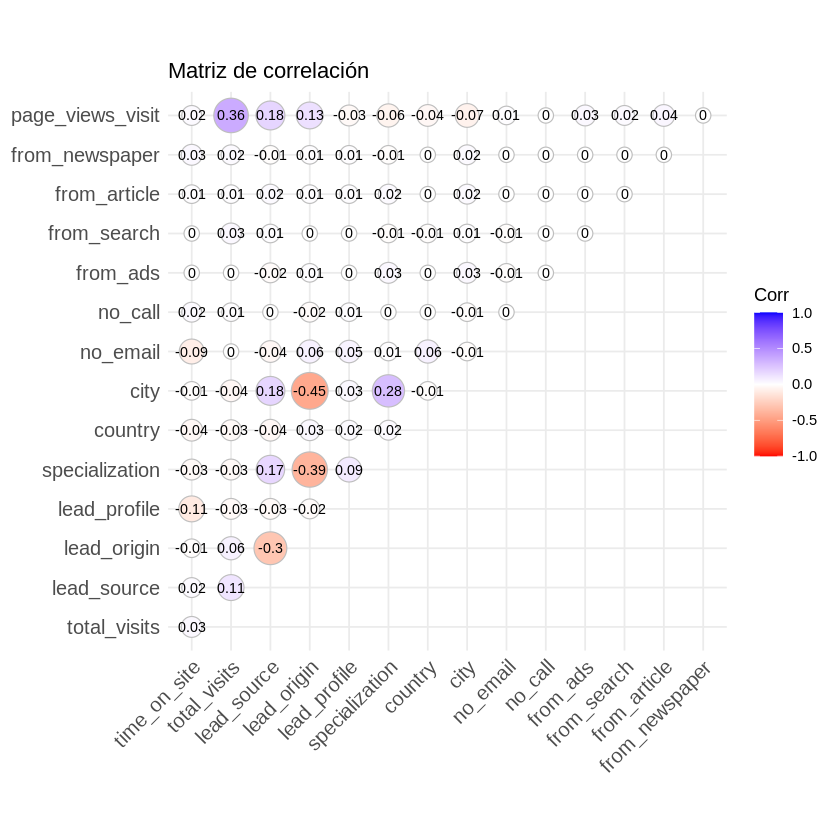

In [ ]:
ggcorrplot(cor_matrix,
           method = "circle",       # También puedes usar "square"
           type = "upper",          # Solo triángulo superior
           lab = TRUE,              # Mostrar valores
           lab_size = 3,
           colors = c("red", "white", "blue"),
           title = "Matriz de correlación",
           ggtheme = ggplot2::theme_minimal())

# Desarrollo

## Pregunta 1

## Pregunta 2

### Pregunta a)


### Pregunta b)

## Pregunta 3

## Pregunta 4

### Pregunta a)

### Pregunta b)

# Resumen